In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
breastcancer = pd.read_csv('/content/breast-cancer.csv')

In [16]:
breastcancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [17]:
breastcancer.shape

(569, 32)

In [18]:
breastcancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [19]:
encoder_y = LabelEncoder()
breastcancer.iloc[:,1] = encoder_y.fit_transform(breastcancer.iloc[:,1].values)

In [20]:
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
x = breastcancer.iloc[:,2:31].values
y = breastcancer.iloc[:,1].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25,stratify=y)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9370629370629371

In [31]:
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn_sc)

0.9370629370629371

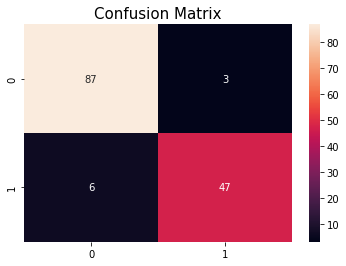

In [33]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [34]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        90
           1       0.94      0.89      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

